In [1]:
#Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('Online_Sales.csv')

In [3]:
cust = pd.read_excel('CustomersData.xlsx')

In [4]:
disc = pd.read_csv('Discount_Coupon.csv')

In [5]:
spend = pd.read_csv('Marketing_Spend.csv')

In [6]:
tax = pd.read_excel('Tax_amount.xlsx')

Reading Files

In [7]:
sales.info()
sales.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used


In [8]:
sales['Product_SKU'].nunique()

1145

In [9]:
cust.info()
cust.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12


In [10]:
disc.info()
disc.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [11]:
disc.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [12]:
disc.rename({'Product_Category ':'Product_Category'},axis=1,inplace = True)
disc.columns

Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [13]:
disc['Product_Category'] = disc['Product_Category'].replace(['Notebooks'],'Notebooks & Journals')

In [14]:
spend.info()
spend.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [15]:
tax.info()
tax.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


,Product_Category,GST
0,Nest-USA,0.1


In [16]:
tax

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


Converting to datetime

In [16]:
sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'],format='%Y%m%d')

In [17]:
disc['Month'] = pd.to_datetime('2019' + disc['Month'], format='%Y%b')

In [18]:
spend['Date'] = pd.to_datetime(spend['Date'])

Joining the data

Customer and Sales

In [19]:
cust_sales = pd.merge(cust,sales,how='left',left_on='CustomerID',right_on = 'CustomerID')


In [20]:
cust_sales['CustomerID'].nunique()

1468

Cust Sales and Tax

In [21]:
cust_sales_t = pd.merge(cust_sales,tax, how='left',left_on='Product_Category',right_on = 'Product_Category')

Cust Sales Tax and Discount ---- Cust Final

In [22]:
cust_sales_t['trans_month'] = cust_sales_t['Transaction_Date'].dt.month
cust_sales_t['trans_month'] = pd.to_datetime('2019' + cust_sales_t['trans_month'].astype(str), format='%Y%m')


In [23]:
cust_final = pd.merge(cust_sales_t,disc,how='left',left_on=['Product_Category','trans_month'],right_on=['Product_Category','Month'])


#### Missing Value Treatment

In [24]:
cust_final.isna().sum()

CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
GST                      0
trans_month              0
Month                  400
Coupon_Code            400
Discount_pct           400
dtype: int64

In [25]:
### Check the data of nan values
tst_df = cust_final[cust_final['Month'].isna()]

In [26]:
tst_df['Product_Category'].unique()

array(['Fun', 'Google', 'Backpacks', 'More Bags'], dtype=object)

In [27]:
tst_df['trans_month'].dt.month.unique()

array([ 1,  4,  7,  9, 10,  6,  5,  3, 11,  8,  2])

In [28]:
cust_final['Discount_pct'] = cust_final['Discount_pct'].fillna(0)
cust_final['Coupon_Code'] = cust_final['Coupon_Code'].fillna('Nil')

cust_final.drop('Month',axis=1,inplace=True)

In [29]:
cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53673 entries, 0 to 53672
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           53673 non-null  int64         
 1   Gender               53673 non-null  object        
 2   Location             53673 non-null  object        
 3   Tenure_Months        53673 non-null  int64         
 4   Transaction_ID       53673 non-null  int64         
 5   Transaction_Date     53673 non-null  datetime64[ns]
 6   Product_SKU          53673 non-null  object        
 7   Product_Description  53673 non-null  object        
 8   Product_Category     53673 non-null  object        
 9   Quantity             53673 non-null  int64         
 10  Avg_Price            53673 non-null  float64       
 11  Delivery_Charges     53673 non-null  float64       
 12  Coupon_Status        53673 non-null  object        
 13  GST                  53673 non-

### EDA

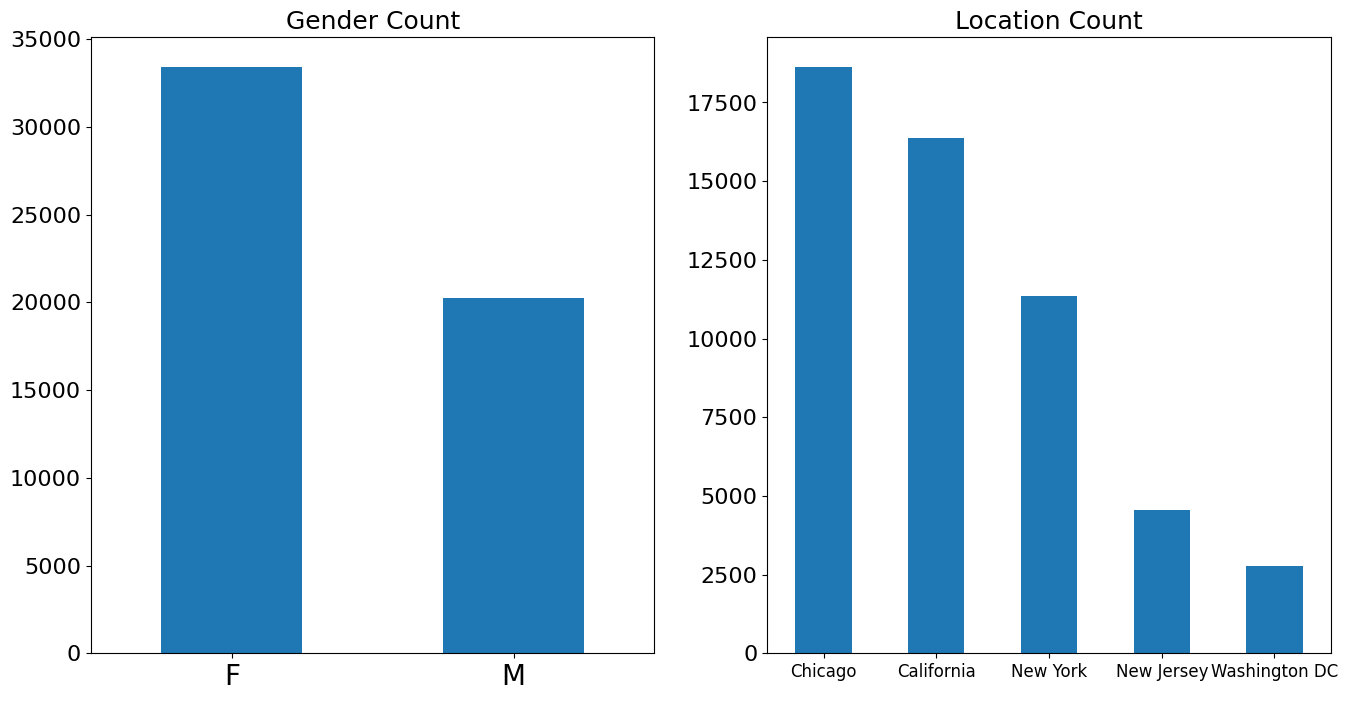

In [257]:
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

cust_final['Gender'].value_counts().plot(kind='bar',rot=0, ax = ax1)
ax1.set_title('Gender Count', fontsize = 18)
ax1.set_xticklabels(cust_final['Gender'].value_counts().index, fontsize=20)
ax1.tick_params(axis='y', labelsize=16)

cust_final['Location'].value_counts().plot(kind='bar',rot=0, ax = ax2)
ax2.set_title('Location Count',fontsize=18)
ax2.set_xticklabels(cust_final['Location'].value_counts().index, fontsize=12)
ax2.tick_params(axis='y', labelsize=16)

plt.show()

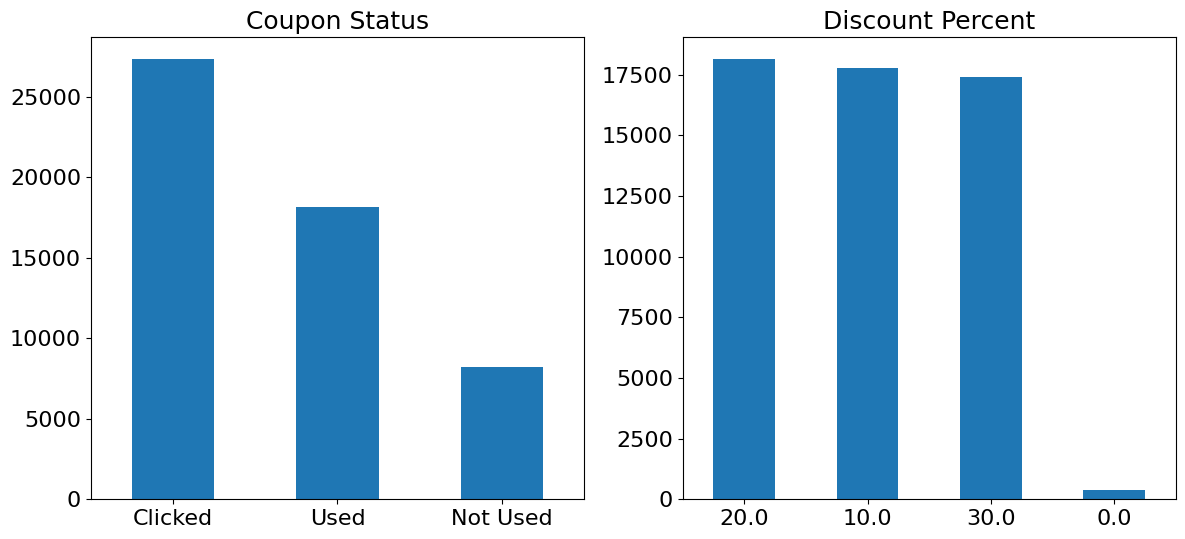

In [258]:
fig = plt.figure(figsize = (14,6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

cust_final['Coupon_Status'].value_counts().plot(kind='bar',rot=0, ax = ax1)
ax1.set_title('Coupon Status', fontsize = 18)
ax1.set_xticklabels(cust_final['Coupon_Status'].value_counts().index, fontsize=16)
ax1.tick_params(axis='y', labelsize=16)

cust_final['Discount_pct'].value_counts().plot(kind='bar',rot=0, ax = ax2)
ax2.set_title('Discount Percent',fontsize=18)
ax2.set_xticklabels(cust_final['Discount_pct'].value_counts().index, fontsize=16)
ax2.tick_params(axis='y', labelsize=16)

plt.show()

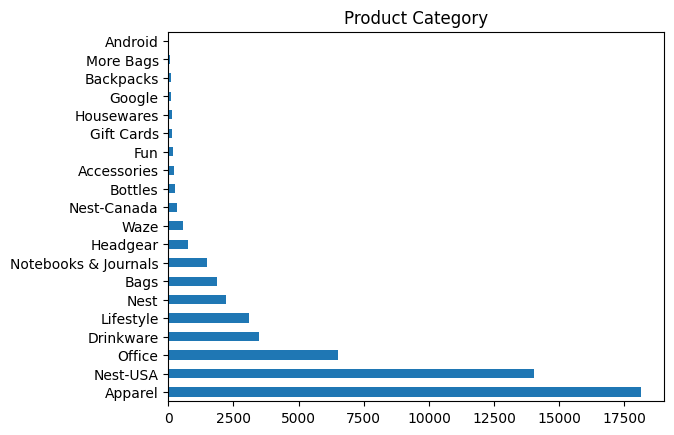

In [259]:
cust_final['Product_Category'].value_counts().plot(kind='barh',rot=0)
plt.title('Product Category')
plt.show()

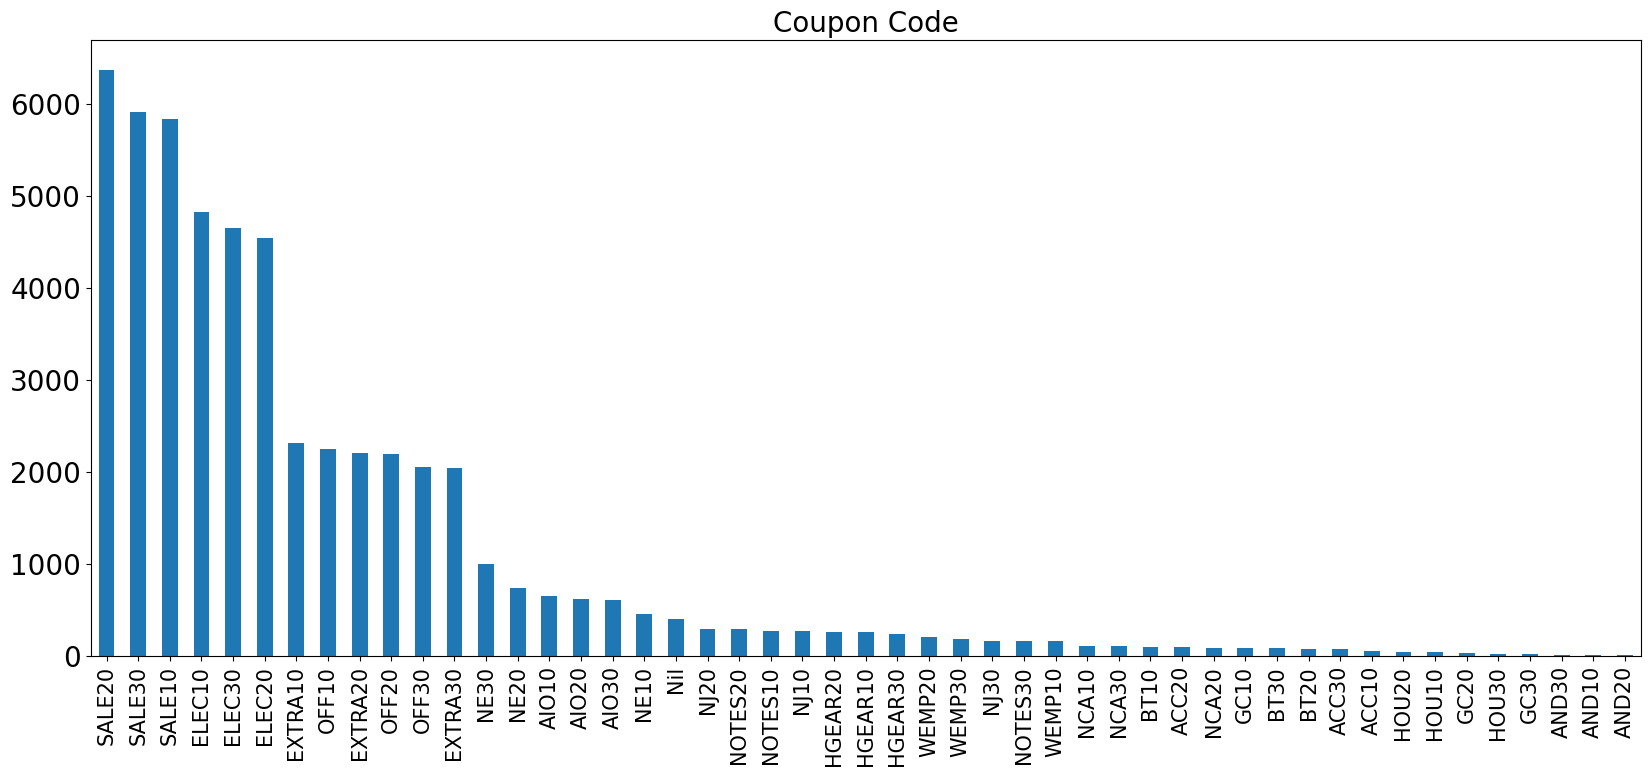

In [260]:
plt.figure(figsize=(20,8))

cust_final['Coupon_Code'].value_counts().plot(kind='bar',rot=90)

plt.title('Coupon Code', fontsize = 20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)

plt.show()
### Fill 0 with 'Nil' implying No Code

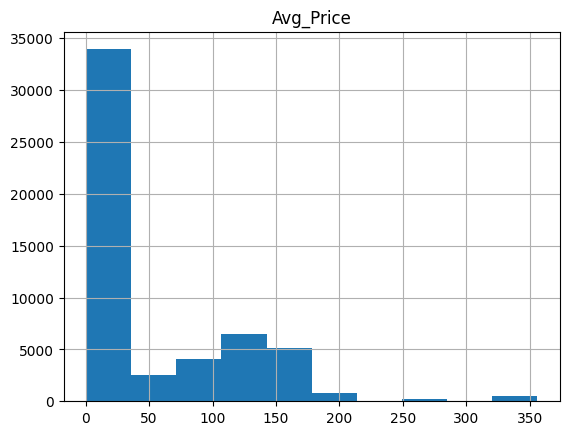

In [261]:
cust_final.hist('Avg_Price')
plt.show()

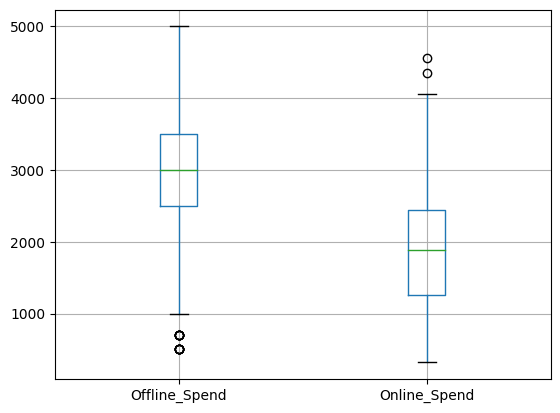

In [263]:
spend.boxplot(column = ['Offline_Spend','Online_Spend'])
plt.show()

Analysis

1. Calculate Revenue for each transaction and item level

  Invoice Value =(( Quantity x Avg_price) x (1-Dicount_pct) x (1+GST))+ Delivery_Charges

In [30]:
cust_final['Transaction_ID'].nunique()

25061

In [31]:
cust_final['Revenue'] = ((cust_final['Quantity']*cust_final['Avg_Price'])*\
                         (1-(cust_final['Discount_pct']/100))*\
                         (1+cust_final['GST']))+ cust_final['Delivery_Charges']

In [32]:
# Revenue per Transaction
cust_final.groupby('Transaction_ID')['Revenue'].sum().round().reset_index()

,Transaction_ID,Revenue
0,16679,159.0
1,16680,159.0
2,16681,9.0
3,16682,786.0
4,16684,337.0
...,...,...
25056,48493,100.0
25057,48494,47.0
25058,48495,123.0
25059,48496,317.0


In [33]:
# Revenue per Product Category
cust_final.groupby('Product_Category')['Revenue'].sum().round().\
            sort_values(ascending =False).reset_index()


,Product_Category,Revenue
0,Nest-USA,2351316.0
1,Apparel,735450.0
2,Nest,439977.0
3,Office,344000.0
4,Drinkware,240268.0
5,Notebooks & Journals,218736.0
6,Bags,168853.0
7,Lifestyle,114559.0
8,Nest-Canada,65546.0
9,Headgear,53454.0


2. Understanding how many customers acquired every month

We will perform Cohort Analysis for this purpose

In [34]:
# Create order month and year from Transaction date -------Already done ----> trans_month
grouping = cust_final.groupby('CustomerID')['trans_month']

# Obtaining the minimum order month from the dataset
cust_final['cohort_mnth_min'] = grouping.transform('min')


In [36]:
cust_final

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,trans_month,Coupon_Code,Discount_pct,Revenue,cohort_mnth_min
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,0.10,2019-01-01,ELEC10,10.0,158.67290,2019-01-01
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,0.10,2019-01-01,ELEC10,10.0,158.67290,2019-01-01
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,0.10,2019-01-01,OFF10,10.0,8.52950,2019-01-01
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,0.18,2019-01-01,SALE10,10.0,99.58430,2019-01-01
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,0.18,2019-01-01,AIO10,10.0,24.02300,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53668,14410,F,New York,45,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,0.10,2019-12-01,ELEC30,30.0,99.90100,2019-12-01
53669,14410,F,New York,45,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,0.18,2019-12-01,SALE30,30.0,46.90792,2019-12-01
53670,14410,F,New York,45,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,0.10,2019-12-01,ELEC30,30.0,123.44760,2019-12-01
53671,14600,F,California,7,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,0.10,2019-12-01,ELEC30,30.0,316.50200,2019-12-01


In [37]:
def get_date_info(cust_final, column):
    month = cust_final[column].dt.month
    day = cust_final[column].dt.day
    return month, day

# Getting the order month from the 'trans_month' column
order_month, _ = get_date_info(cust_final, 'trans_month')

# Getting the minimum order month for date from the 'cohort_mnth_min' column
cohort_month, _ = get_date_info(cust_final, 'cohort_mnth_min')

In [43]:
order_month.shape, cohort_month.shape

((53673,), (53673,))

In [38]:
# Calculate difference in months
months_diff = order_month - cohort_month

""" Extract the difference in months from all previous values
 "+1" is added at the end so that first month is marked as 1 instead of 0.
 """
cust_final['cohort_index'] = months_diff  + 1
print(cust_final.head(1).T)

                                                                     0
CustomerID                                                       17850
Gender                                                               M
Location                                                       Chicago
Tenure_Months                                                       12
Transaction_ID                                                   16679
Transaction_Date                                   2019-01-01 00:00:00
Product_SKU                                             GGOENEBJ079499
Product_Description  Nest Learning Thermostat 3rd Gen-USA - Stainle...
Product_Category                                              Nest-USA
Quantity                                                             1
Avg_Price                                                       153.71
Delivery_Charges                                                   6.5
Coupon_Status                                                     Used
GST   

In [44]:
cust_final['cohort_index'].unique()

array([ 1,  8, 12,  3,  6,  9, 10, 11,  2,  4,  5,  7])

In [45]:
#count number of customers in each group
group = cust_final.groupby(['cohort_mnth_min', 'cohort_index'])
cohort_data = group['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index = 'cohort_mnth_min',
                                  columns = 'cohort_index',
                                  values = 'CustomerID')

cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_mnth_min,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06-01,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cohort_data

,cohort_mnth_min,cohort_index,CustomerID
0,2019-01-01,1,215
1,2019-01-01,2,13
2,2019-01-01,3,24
3,2019-01-01,4,34
4,2019-01-01,5,23
...,...,...,...
73,2019-10-01,2,6
74,2019-10-01,3,4
75,2019-11-01,1,68
76,2019-11-01,2,7


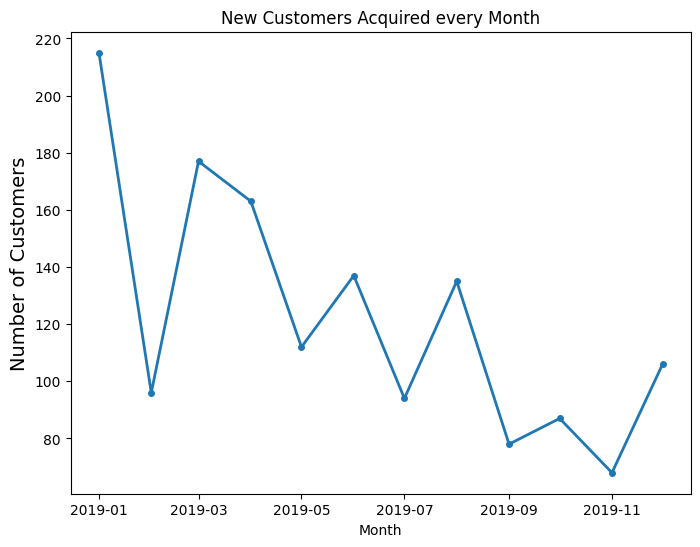

In [40]:
import calendar

cohort_sizes = cohort_counts.iloc[:,0]

plt.figure(figsize=(8,6))
plt.plot(cohort_sizes,lw=2,marker='o',ms=4)

plt.ylabel('Number of Customers', fontsize=14)
plt.yticks(fontsize=10)

plt.xlabel('Month')

plt.title('New Customers Acquired every Month')

plt.show()

Understand the retention of customers on month on month basis

In [41]:
retention = ((cohort_counts.divide(cohort_sizes, axis=0)).round(3))*100
retention.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_mnth_min,,,,,,,,,,,,
2019-01-01,100.0,6.0,11.2,15.8,10.7,20.5,16.3,21.9,10.7,13.0,9.3,15.8
2019-02-01,100.0,7.3,9.4,16.7,17.7,22.9,19.8,15.6,12.5,11.5,16.7,NaN
2019-03-01,100.0,10.2,19.8,14.1,18.1,18.6,12.4,12.4,8.5,10.7,NaN,NaN
2019-04-01,100.0,8.6,14.7,14.7,11.0,9.2,6.1,9.8,7.4,NaN,NaN,NaN
2019-05-01,100.0,10.7,8.0,11.6,8.9,11.6,12.5,7.1,NaN,NaN,NaN,NaN


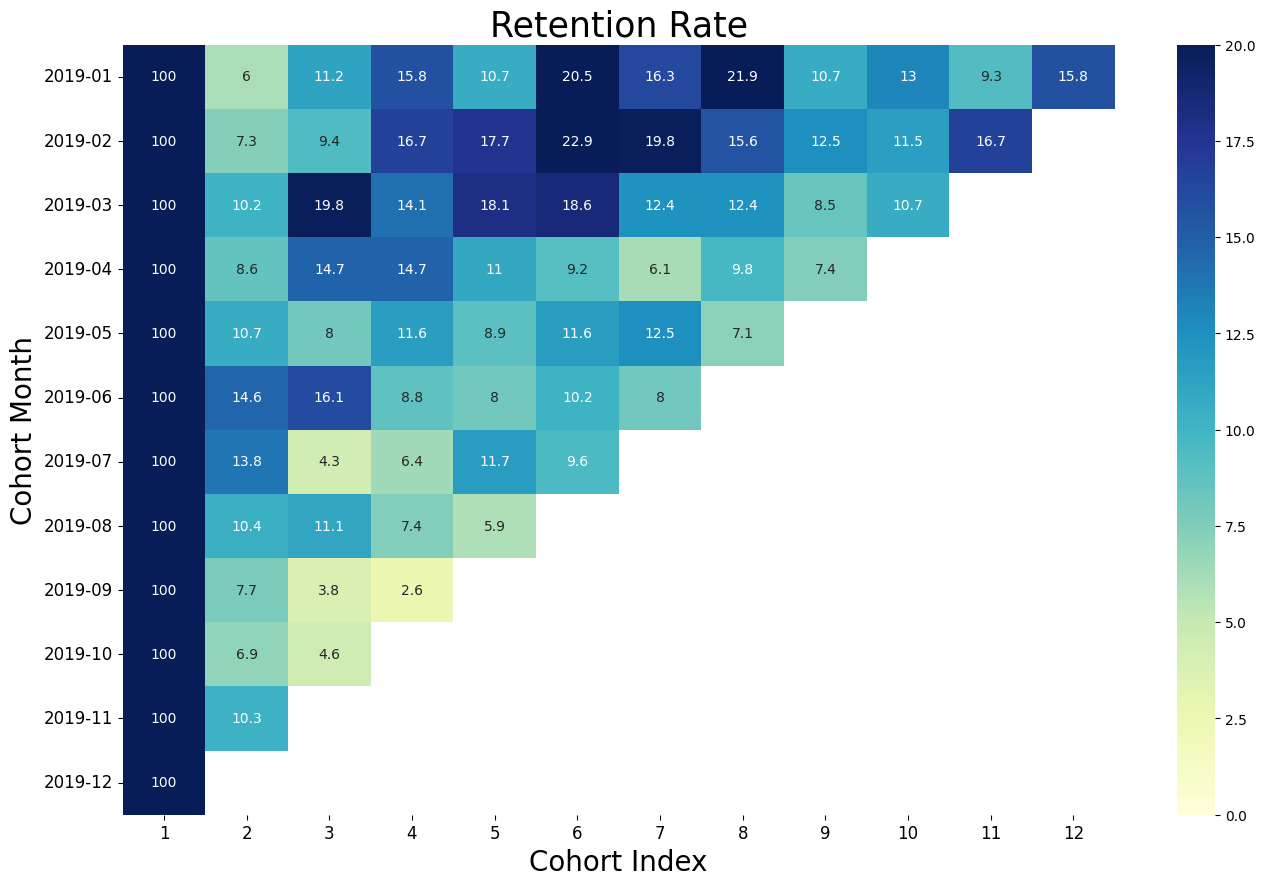

In [42]:
retention.index = retention.index.strftime('%Y-%m')

plt.figure(figsize=(16, 10))
plt.title('Retention Rate', fontsize = 25)

# Creating the heatmap
sns.heatmap(retention, mask=retention.isnull(),
            annot = True,vmin = 0.0, vmax = 20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month',fontsize=20)
plt.xlabel('Cohort Index',fontsize=20)
plt.yticks(rotation=0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()

How the revenues from existing/new customers on month on month basis

In [43]:
cohort_data1 = cust_final.groupby(['cohort_mnth_min', 'cohort_index'])['Revenue'].mean().reset_index()
average_sales  = cohort_data1.pivot_table(index = 'cohort_mnth_min',
                                           columns = 'cohort_index',
                                      values = 'Revenue').round()
average_sales

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_mnth_min,,,,,,,,,,,,
2019-01-01,114.0,93.0,80.0,172.0,71.0,63.0,99.0,70.0,70.0,106.0,119.0,104.0
2019-02-01,101.0,57.0,91.0,64.0,68.0,69.0,70.0,77.0,105.0,125.0,101.0,NaN
2019-03-01,78.0,138.0,72.0,81.0,98.0,97.0,76.0,126.0,97.0,93.0,NaN,NaN
2019-04-01,93.0,101.0,66.0,78.0,83.0,91.0,120.0,142.0,93.0,NaN,NaN,NaN
2019-05-01,68.0,65.0,74.0,57.0,91.0,94.0,138.0,85.0,NaN,NaN,NaN,NaN
2019-06-01,70.0,55.0,68.0,67.0,76.0,105.0,82.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,80.0,61.0,68.0,88.0,152.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,64.0,99.0,101.0,126.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,73.0,109.0,93.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


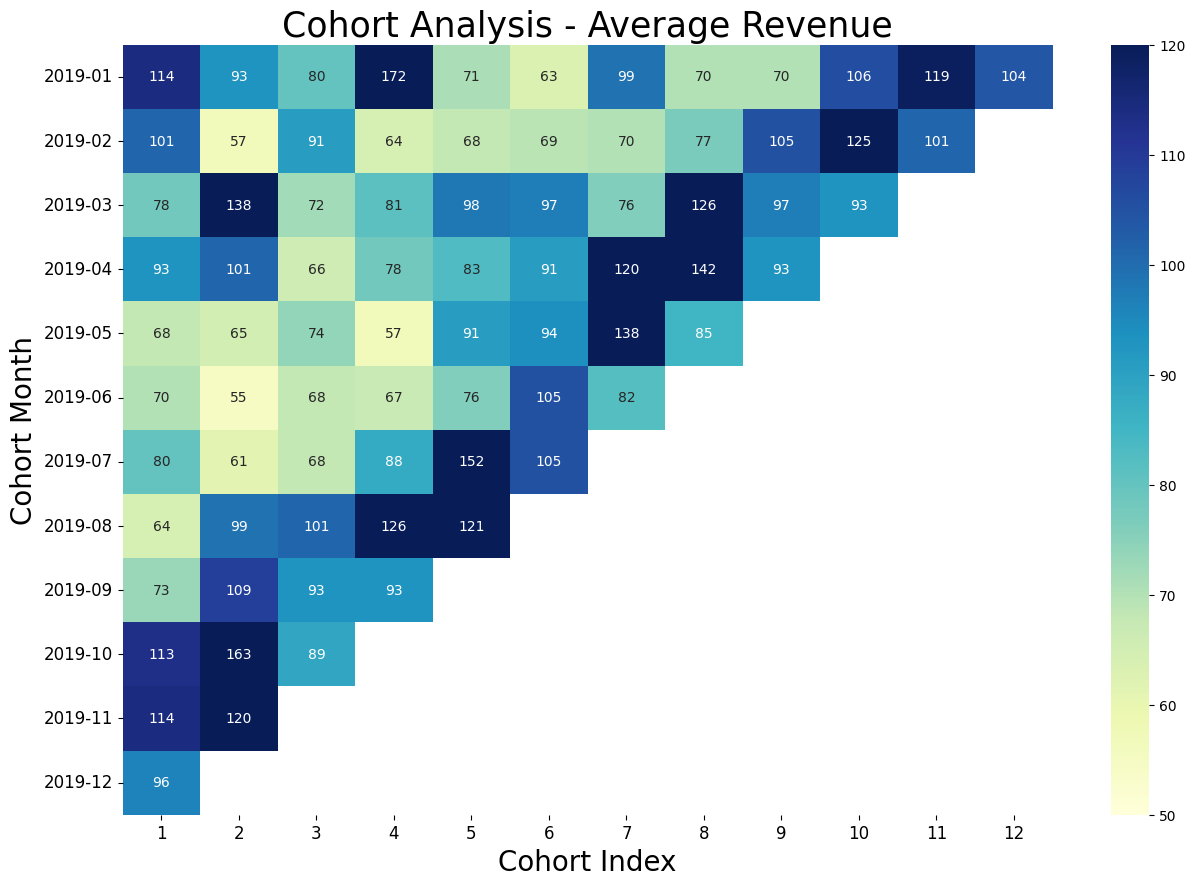

In [44]:
plt.figure(figsize = (15,10))
average_sales.index = average_sales.index.strftime('%Y-%m')

plt.title('Cohort Analysis - Average Revenue',fontsize=25)
sns.heatmap(data = average_sales,
            annot = True, vmin=50,vmax=120,
            cmap = "YlGnBu",fmt='g')
plt.ylabel('Cohort Month',fontsize=20)
plt.xlabel('Cohort Index',fontsize=20)
plt.yticks(rotation=0, fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()

How the discounts are playing role in the revenues ?

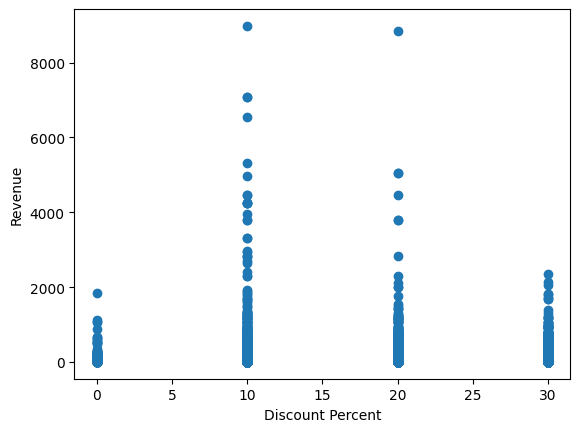

In [45]:
plt.scatter(cust_final['Discount_pct'],cust_final['Revenue'])
plt.xlabel('Discount Percent')
plt.ylabel('Revenue')
plt.show()

As we have to compare between multiple categories, we will run ANOVA test.

Null Hypothesis H0: Revenue across different discount percent is similar.

Alternate Hypothesis H1: Revenue is different for at least 1 category.

We set the significance at 0.05

In [46]:
from scipy.stats import f_oneway

f_oneway(cust_final.loc[cust_final['Discount_pct']== 0.0,'Revenue'],
         cust_final.loc[cust_final['Discount_pct']== 10.0,'Revenue'],
         cust_final.loc[cust_final['Discount_pct']== 20.0,'Revenue'],
         cust_final.loc[cust_final['Discount_pct']== 30.0,'Revenue'])


F_onewayResult(statistic=61.6567117250253, pvalue=8.717287723194664e-40)

As p-value is less than 0.05, we reject the Null Hypothesis that revenue across different discounts is similar.

Therefore discount is playing a role in revenue for at least 1 category.

Analyse KPI’s like Revenue, number of orders, average order value, number of
customers (existing/new), quantity, by category, by month, by week, by day etc…


#### Revenue 

In [47]:
## Total Revenue
cust_final['Revenue'].sum().round()

4823880.0

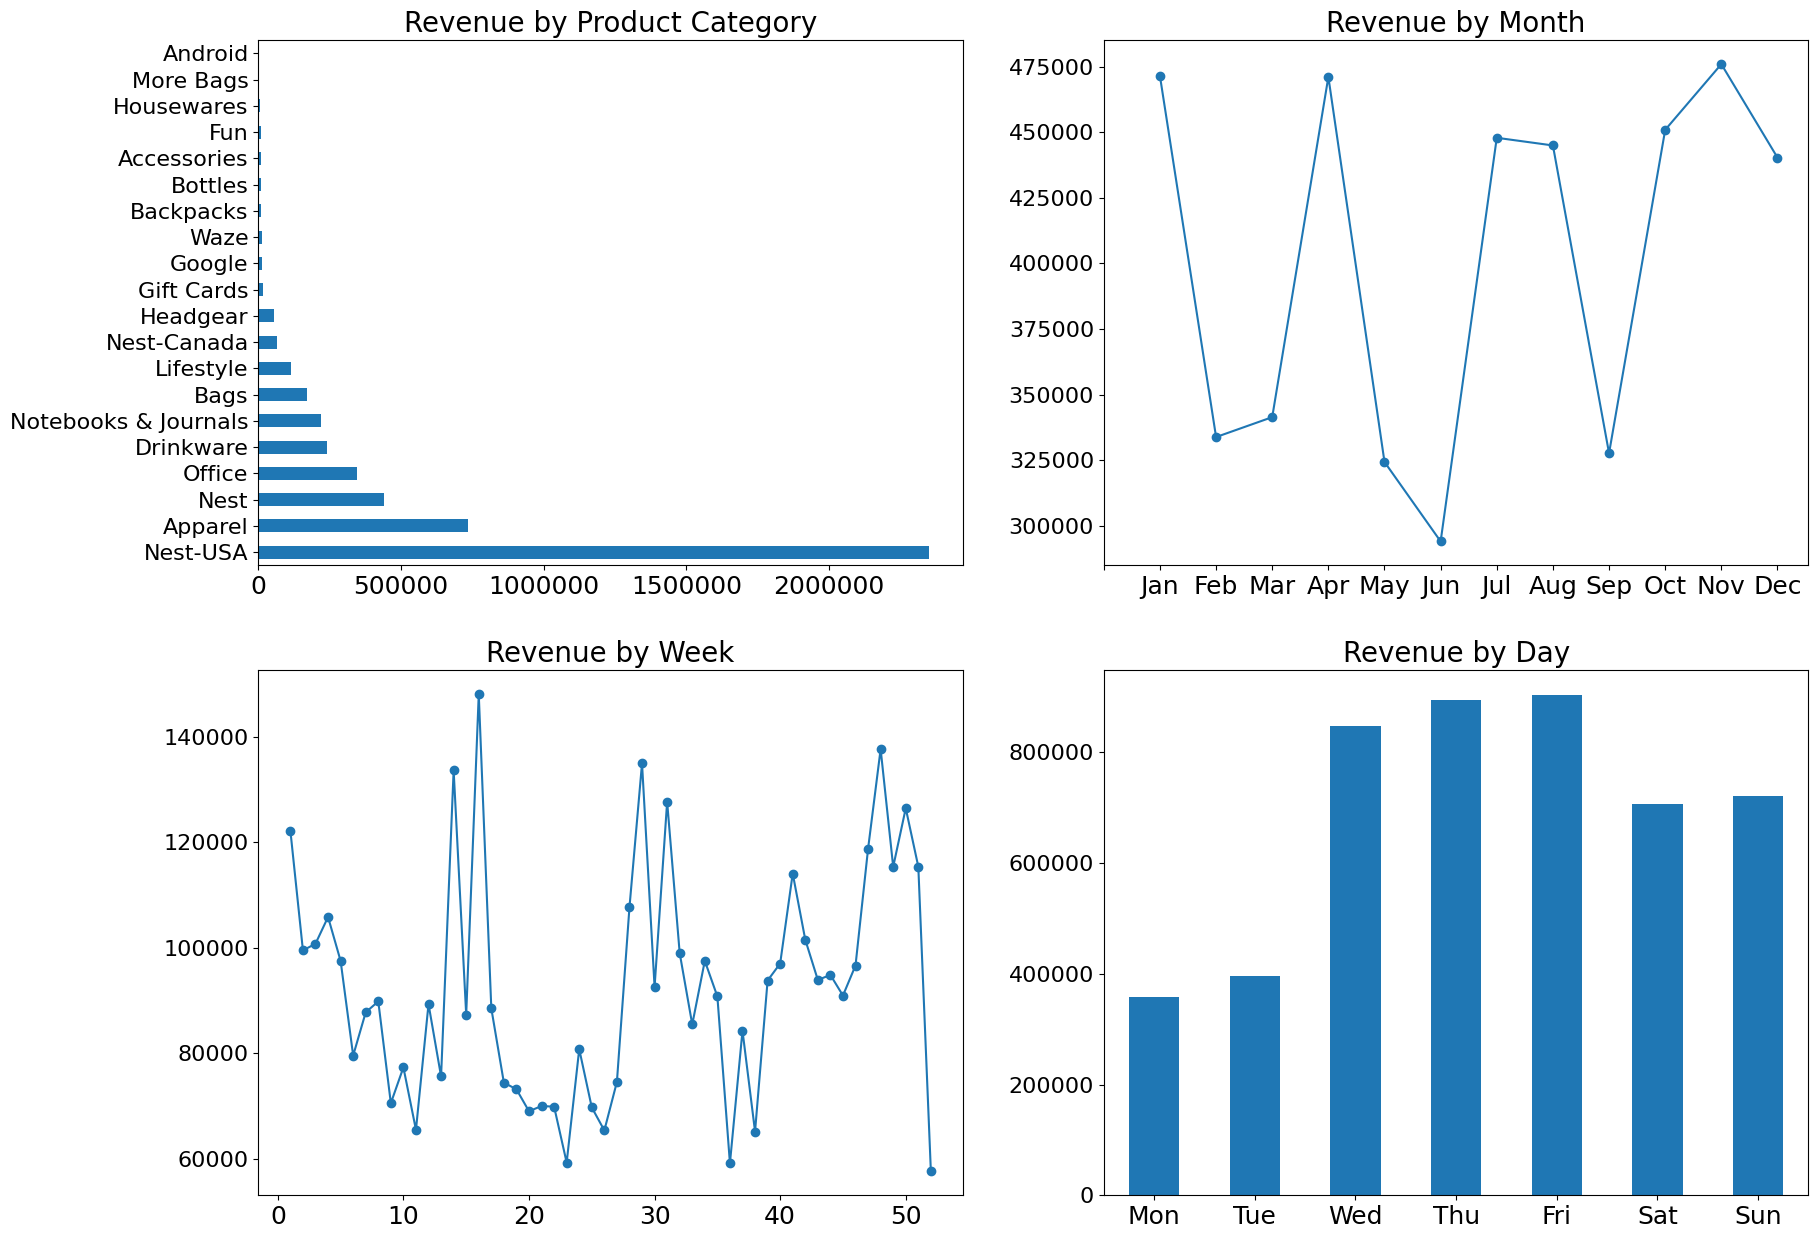

In [48]:
import calendar

#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig, axes = plt.subplots(2,2, figsize=(20,15))

cust_final.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).plot(kind='barh', ax=axes[0,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.month)['Revenue'].sum().plot(marker='o',ax=axes[0,1])
cust_final.groupby(cust_final['Transaction_Date'].dt.isocalendar().week)['Revenue'].sum().plot(marker='o', ax=axes[1,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.dayofweek)['Revenue'].sum().plot(kind='bar',ax=axes[1,1])

axes[0,0].set_title('Revenue by Product Category', fontsize = 20)
axes[0,0].set_ylabel('')
axes[0,0].tick_params(axis='y', labelsize=16)
axes[0,0].tick_params(axis='x', labelsize=18)
axes[0,0].ticklabel_format(axis= 'x',style='plain')

axes[0,1].set_title('Revenue by Month', fontsize = 20)
axes[0,1].tick_params(axis='y', labelsize=16)
axes[0,1].tick_params(axis='x', labelsize=18)
axes[0,1].set_xlabel('')

labels = [calendar.month_abbr[num] for num in range(0,13)]
axes[0,1].set_xticks(range(0,13),labels,rotation=0)

axes[1,0].set_title('Revenue by Week', fontsize = 20)
axes[1,0].tick_params(axis='y', labelsize=16)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_xlabel('')

axes[1,1].set_title('Revenue by Day', fontsize = 20)
axes[1,1].tick_params(axis='y', labelsize=16)
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('')

labels = [calendar.day_abbr[num] for num in range(0,7)]
axes[1,1].set_xticks(range(0,7),labels,rotation=0)

plt.show()

#### Orders

In [49]:
## Total Number of Orders
cust_final['Transaction_ID'].count()

53673

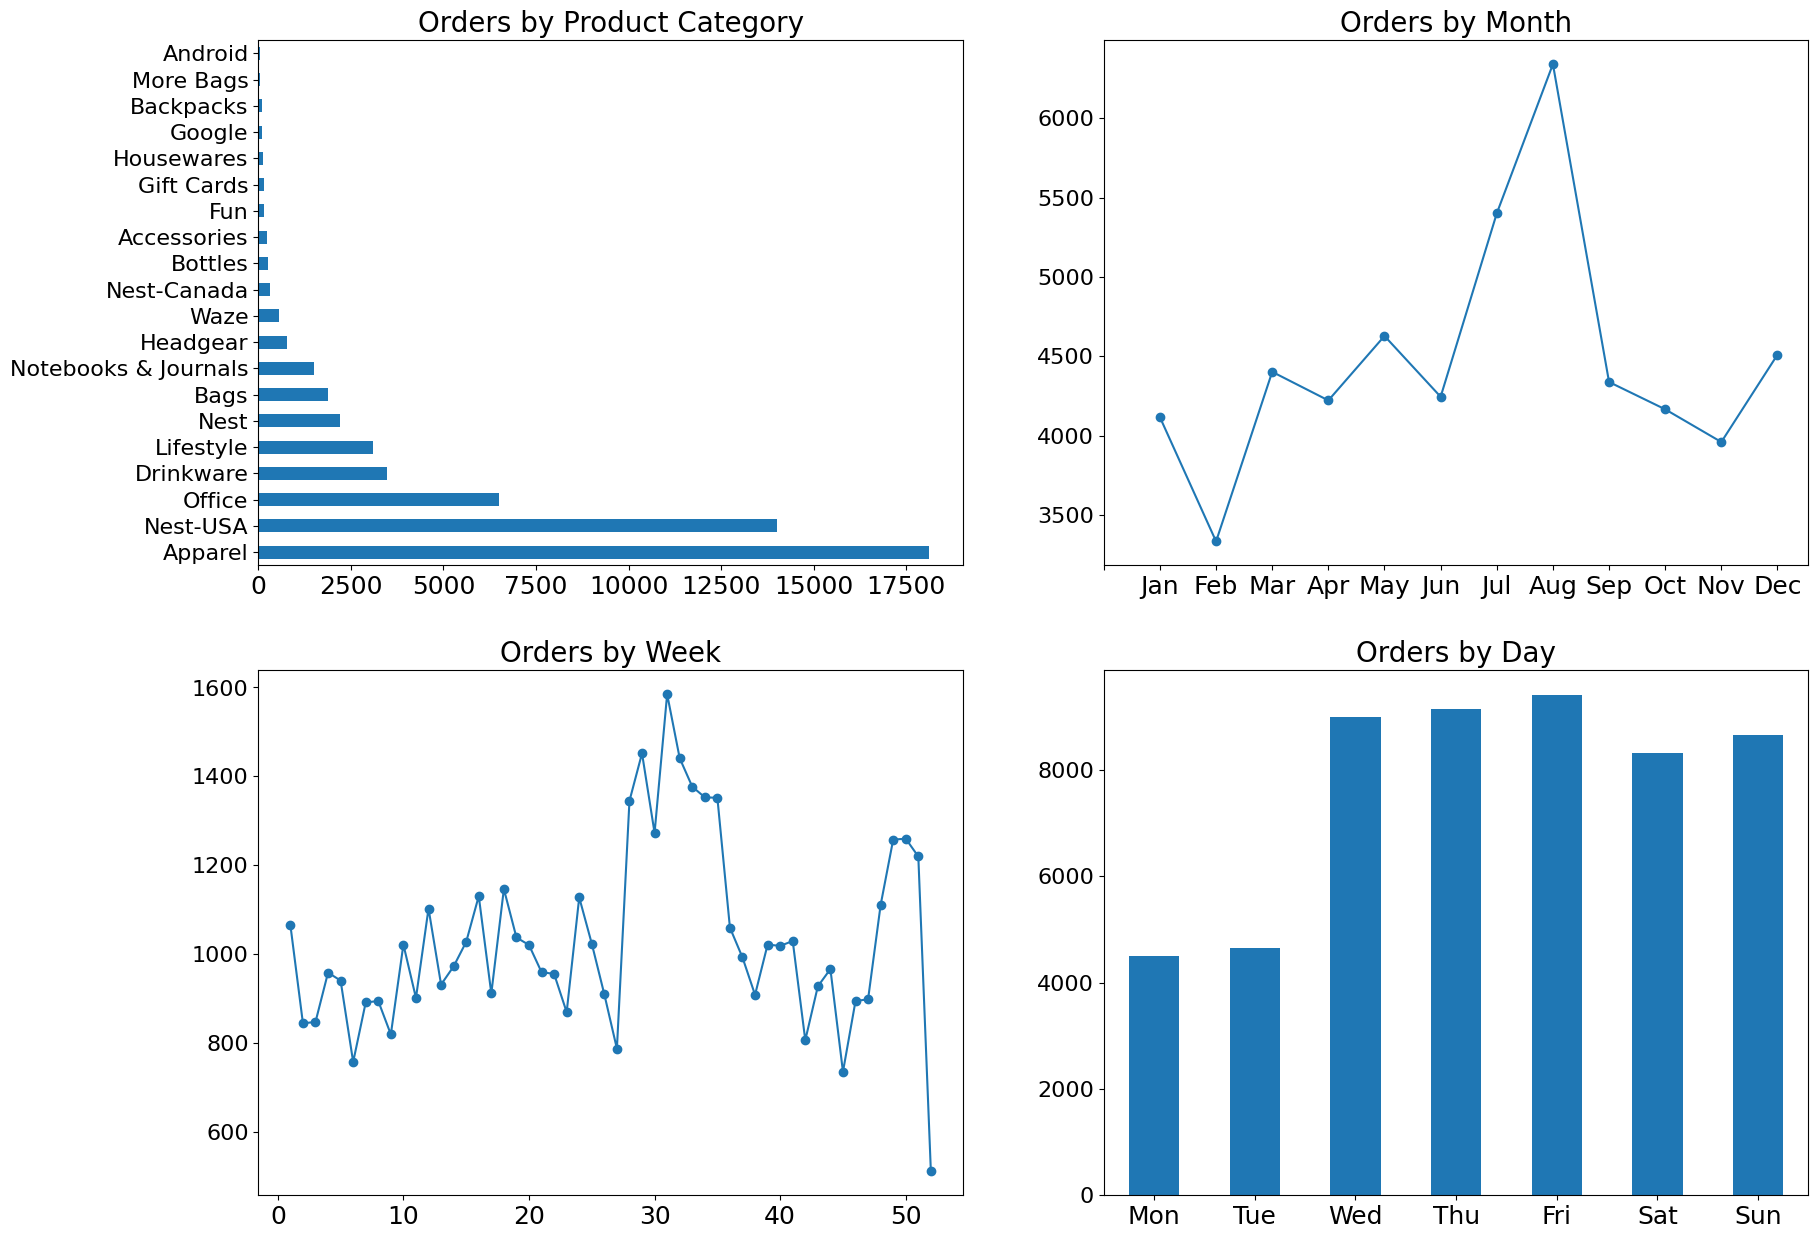

In [50]:
# import calendar
fig, axes = plt.subplots(2,2, figsize=(20,15))

cust_final.groupby('Product_Category')['Transaction_ID'].count().sort_values(ascending=False).plot(kind='barh', ax=axes[0,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.month)['Transaction_ID'].count().plot(marker='o',ax=axes[0,1])
cust_final.groupby(cust_final['Transaction_Date'].dt.isocalendar().week)['Transaction_ID'].count().plot(marker='o', ax=axes[1,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.dayofweek)['Transaction_ID'].count().plot(kind='bar',ax=axes[1,1])

axes[0,0].set_title('Orders by Product Category', fontsize = 20)
axes[0,0].set_ylabel('')
axes[0,0].tick_params(axis='y', labelsize=16)
axes[0,0].tick_params(axis='x', labelsize=18)
#axes[0,0].ticklabel_format(axis= 'x',style='plain')

axes[0,1].set_title('Orders by Month', fontsize = 20)
axes[0,1].tick_params(axis='y', labelsize=16)
axes[0,1].tick_params(axis='x', labelsize=18)
axes[0,1].set_xlabel('')

labels = [calendar.month_abbr[num] for num in range(0,13)]
axes[0,1].set_xticks(range(0,13),labels,rotation=0)

axes[1,0].set_title('Orders by Week', fontsize = 20)
axes[1,0].tick_params(axis='y', labelsize=16)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_xlabel('')

axes[1,1].set_title('Orders by Day', fontsize = 20)
axes[1,1].tick_params(axis='y', labelsize=16)
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('')

labels = [calendar.day_abbr[num] for num in range(0,7)]
axes[1,1].set_xticks(range(0,7),labels,rotation=0)

plt.show()

#### Average Order Value

In [51]:
## Average Order Value
cust_final['Avg_Price'].mean().round()

52.0

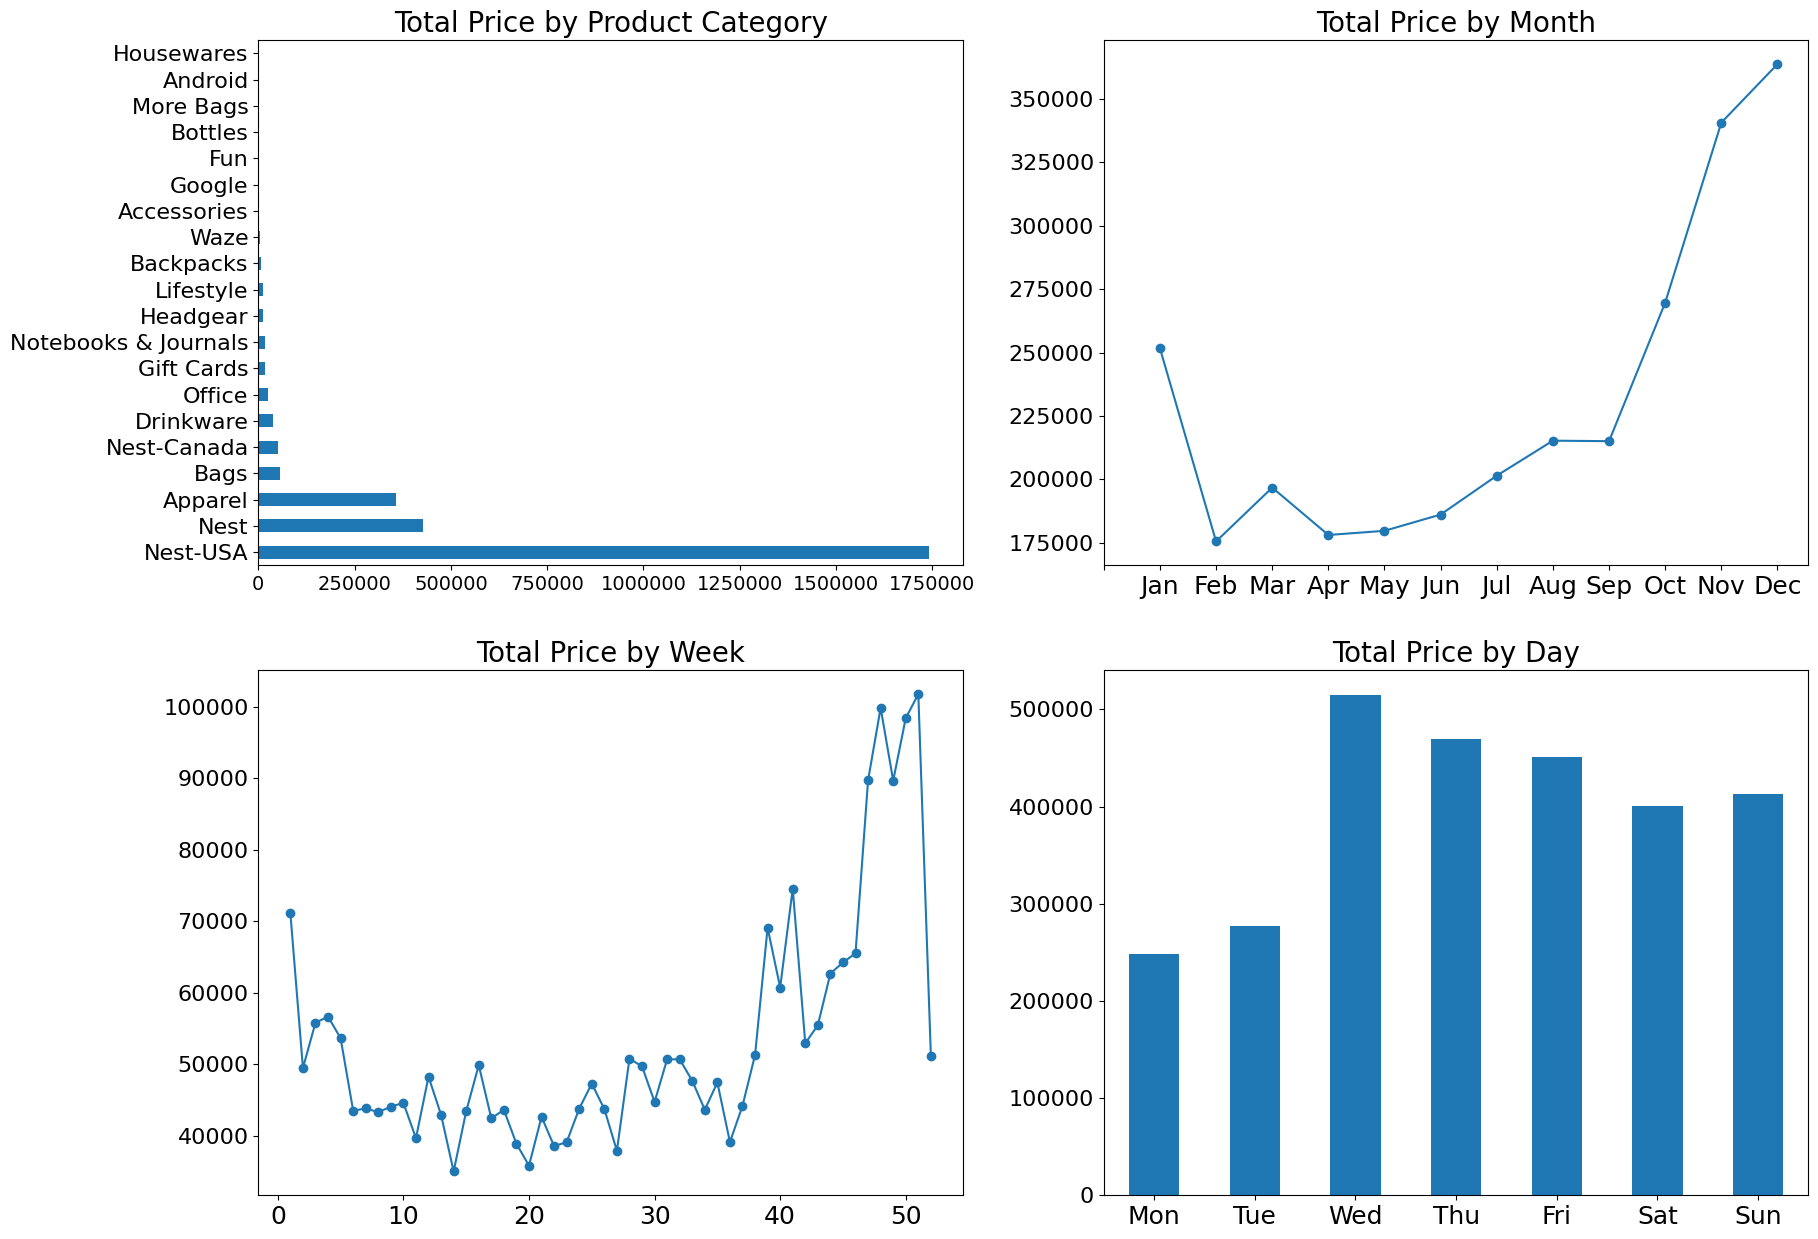

In [52]:
#import calendar

fig, axes = plt.subplots(2,2, figsize=(20,15))

cust_final.groupby('Product_Category')['Avg_Price'].sum().sort_values(ascending=False).plot(kind='barh', ax=axes[0,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.month)['Avg_Price'].sum().plot(marker='o',ax=axes[0,1])
cust_final.groupby(cust_final['Transaction_Date'].dt.isocalendar().week)['Avg_Price'].sum().plot(marker='o', ax=axes[1,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.dayofweek)['Avg_Price'].sum().plot(kind='bar',ax=axes[1,1])

axes[0,0].set_title('Total Price by Product Category', fontsize = 20)
axes[0,0].set_ylabel('')
axes[0,0].tick_params(axis='y', labelsize=16)
axes[0,0].tick_params(axis='x', labelsize=14)
axes[0,0].ticklabel_format(axis= 'x',style='plain')

axes[0,1].set_title('Total Price by Month', fontsize = 20)
axes[0,1].tick_params(axis='y', labelsize=16)
axes[0,1].tick_params(axis='x', labelsize=18)
axes[0,1].set_xlabel('')

labels = [calendar.month_abbr[num] for num in range(0,13)]
axes[0,1].set_xticks(range(0,13),labels,rotation=0)

axes[1,0].set_title('Total Price by Week', fontsize = 20)
axes[1,0].tick_params(axis='y', labelsize=16)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_xlabel('')

axes[1,1].set_title('Total Price by Day', fontsize = 20)
axes[1,1].tick_params(axis='y', labelsize=16)
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('')

labels = [calendar.day_abbr[num] for num in range(0,7)]
axes[1,1].set_xticks(range(0,7),labels,rotation=0)

plt.show()

#### Total Customers

In [53]:
## Total Customers
cust_final['CustomerID'].nunique(), cust_final['CustomerID'].count()

(1468, 53673)

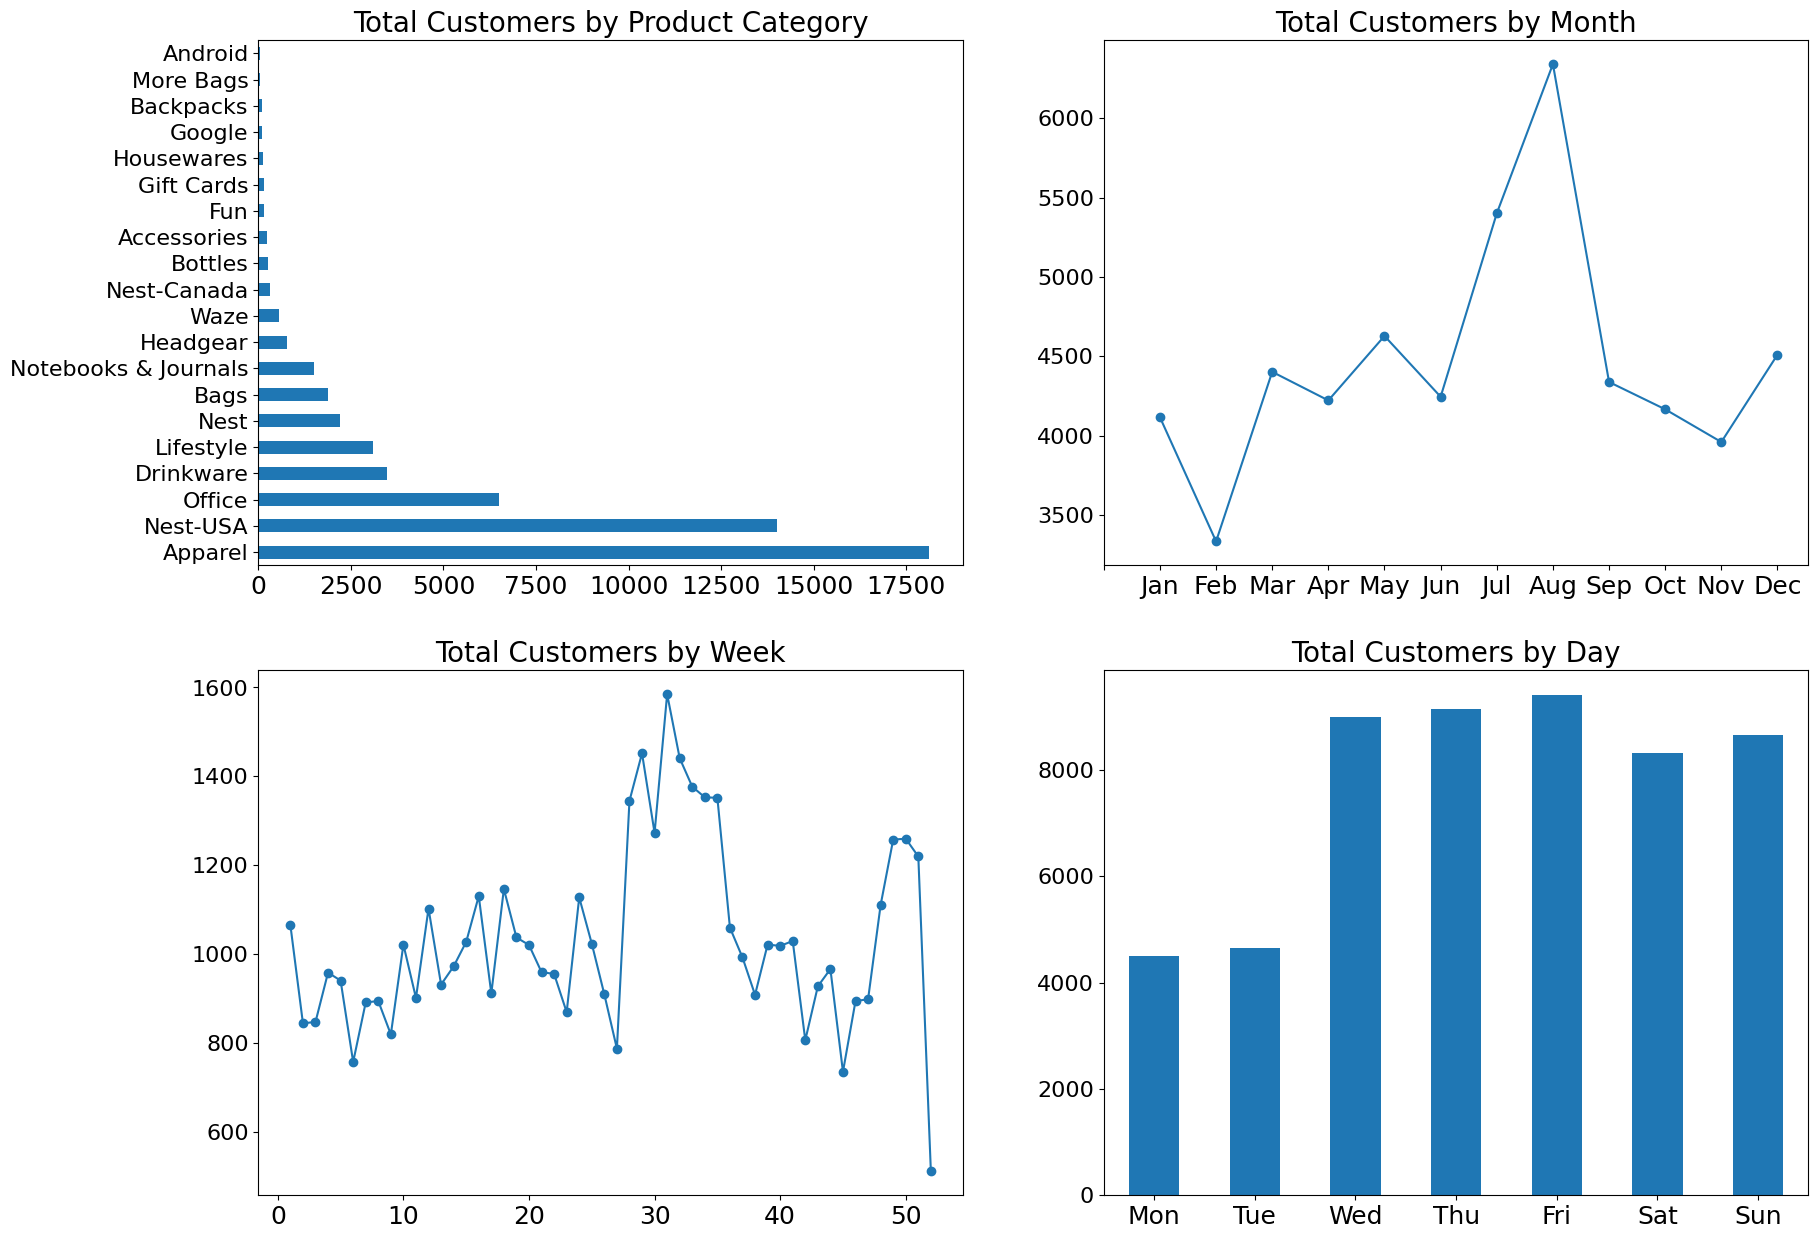

In [54]:
# import calendar
fig, axes = plt.subplots(2,2, figsize=(20,15))

cust_final.groupby('Product_Category')['CustomerID'].count().sort_values(ascending=False).plot(kind='barh', ax=axes[0,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.month)['CustomerID'].count().plot(marker='o',ax=axes[0,1])
cust_final.groupby(cust_final['Transaction_Date'].dt.isocalendar().week)['CustomerID'].count().plot(marker='o', ax=axes[1,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.dayofweek)['CustomerID'].count().plot(kind='bar',ax=axes[1,1])

axes[0,0].set_title('Total Customers by Product Category', fontsize = 20)
axes[0,0].set_ylabel('')
axes[0,0].tick_params(axis='y', labelsize=16)
axes[0,0].tick_params(axis='x', labelsize=18)
#axes[0,0].ticklabel_format(axis= 'x',style='plain')

axes[0,1].set_title('Total Customers by Month', fontsize = 20)
axes[0,1].tick_params(axis='y', labelsize=16)
axes[0,1].tick_params(axis='x', labelsize=18)
axes[0,1].set_xlabel('')

labels = [calendar.month_abbr[num] for num in range(0,13)]
axes[0,1].set_xticks(range(0,13),labels,rotation=0)

axes[1,0].set_title('Total Customers by Week', fontsize = 20)
axes[1,0].tick_params(axis='y', labelsize=16)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_xlabel('')

axes[1,1].set_title('Total Customers by Day', fontsize = 20)
axes[1,1].tick_params(axis='y', labelsize=16)
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('')

labels = [calendar.day_abbr[num] for num in range(0,7)]
axes[1,1].set_xticks(range(0,7),labels,rotation=0)

plt.show()

#### Total Quantity

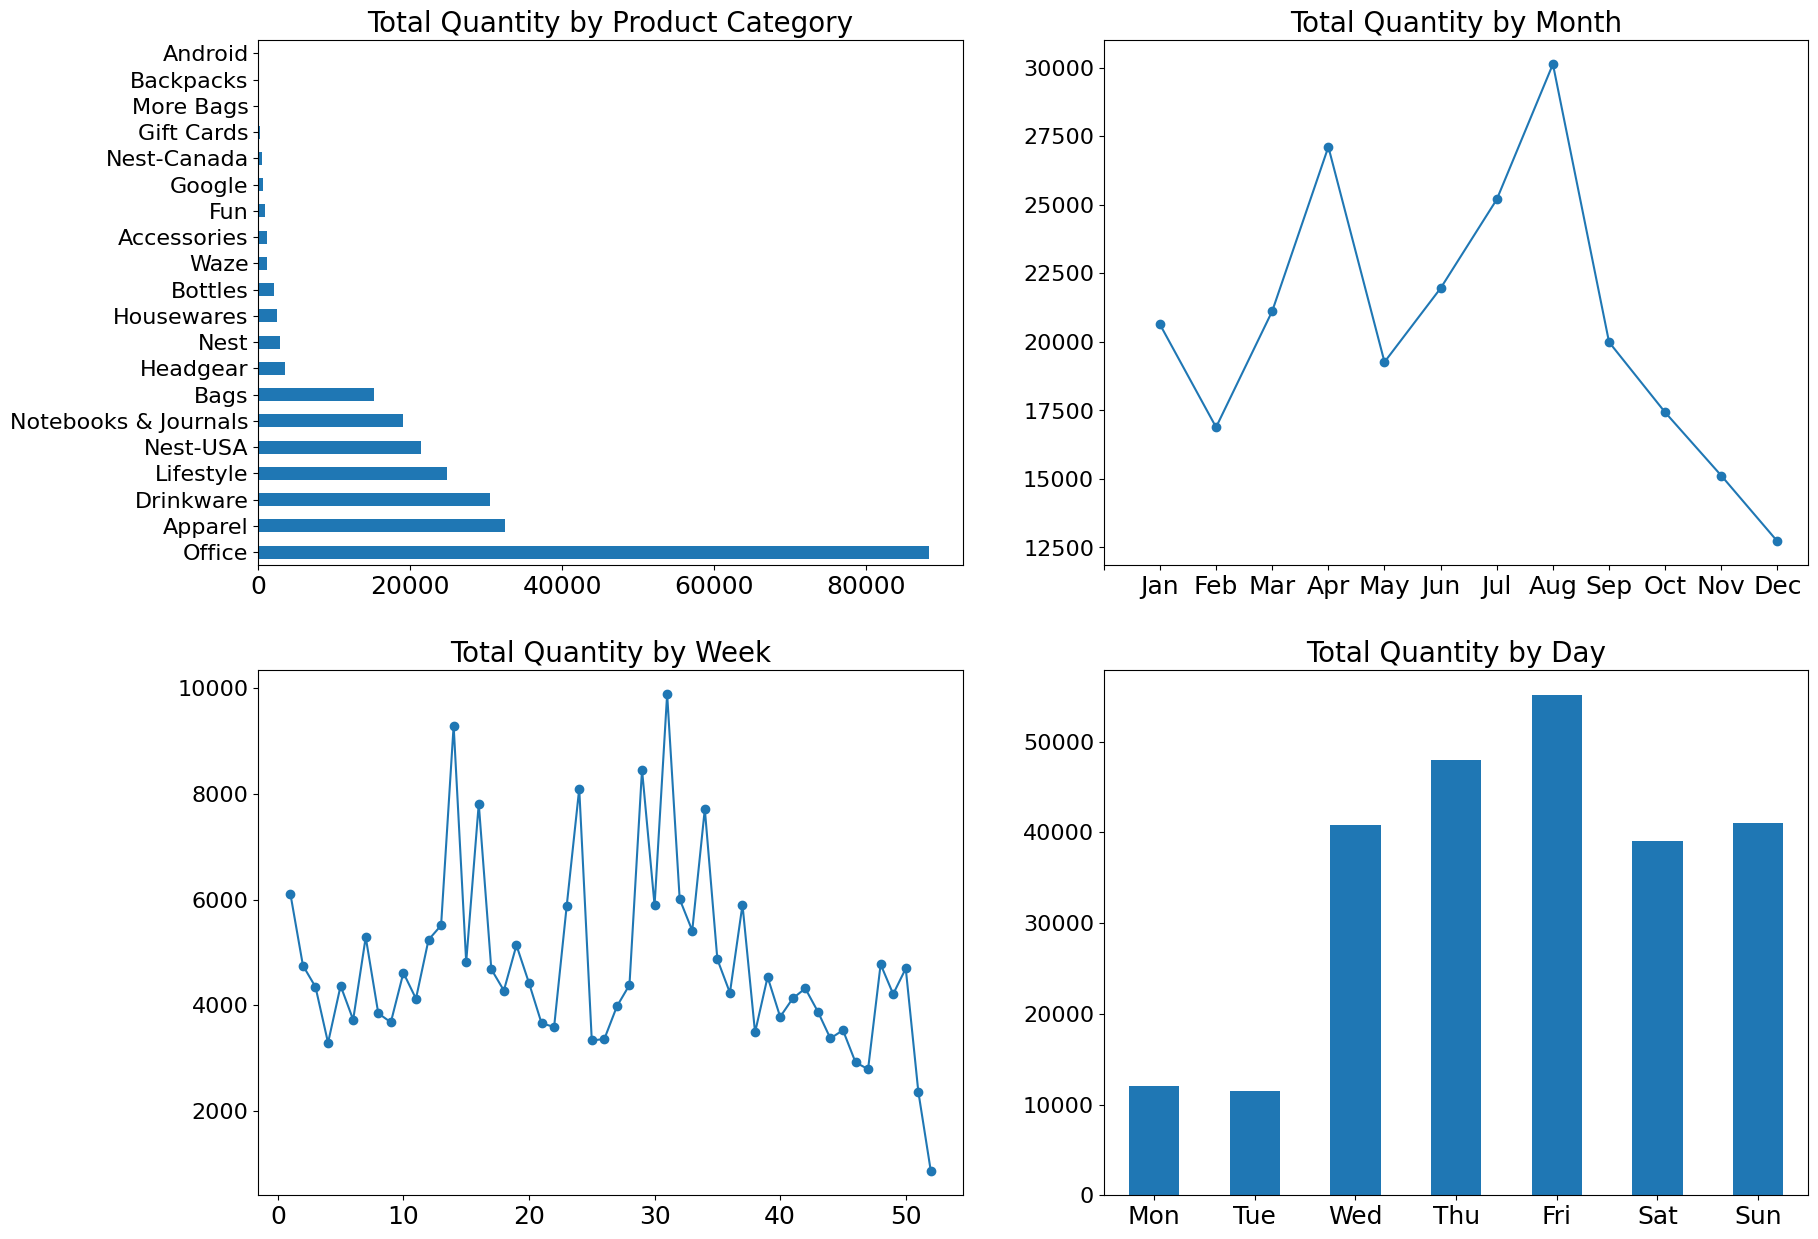

In [55]:
#import calendar

fig, axes = plt.subplots(2,2, figsize=(20,15))

cust_final.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False).plot(kind='barh', ax=axes[0,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.month)['Quantity'].sum().plot(marker='o',ax=axes[0,1])
cust_final.groupby(cust_final['Transaction_Date'].dt.isocalendar().week)['Quantity'].sum().plot(marker='o', ax=axes[1,0])
cust_final.groupby(cust_final['Transaction_Date'].dt.dayofweek)['Quantity'].sum().plot(kind='bar',ax=axes[1,1])

axes[0,0].set_title('Total Quantity by Product Category', fontsize = 20)
axes[0,0].set_ylabel('')
axes[0,0].tick_params(axis='y', labelsize=16)
axes[0,0].tick_params(axis='x', labelsize=18)
axes[0,0].ticklabel_format(axis= 'x',style='plain')

axes[0,1].set_title('Total Quantity by Month', fontsize = 20)
axes[0,1].tick_params(axis='y', labelsize=16)
axes[0,1].tick_params(axis='x', labelsize=18)
axes[0,1].set_xlabel('')

labels = [calendar.month_abbr[num] for num in range(0,13)]
axes[0,1].set_xticks(range(0,13),labels,rotation=0)

axes[1,0].set_title('Total Quantity by Week', fontsize = 20)
axes[1,0].tick_params(axis='y', labelsize=16)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_xlabel('')

axes[1,1].set_title('Total Quantity by Day', fontsize = 20)
axes[1,1].tick_params(axis='y', labelsize=16)
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('')

labels = [calendar.day_abbr[num] for num in range(0,7)]
axes[1,1].set_xticks(range(0,7),labels,rotation=0)

plt.show()

Understand the trends/seasonality of sales by category, location, month etc…

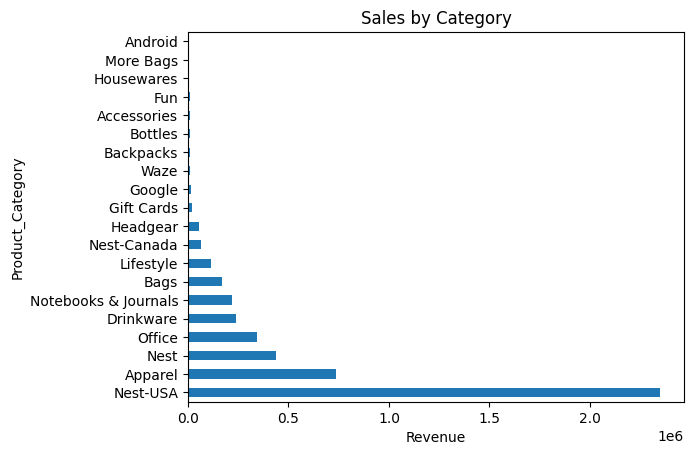

In [56]:
cust_final.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Revenue')
plt.title('Sales by Category')

plt.show()

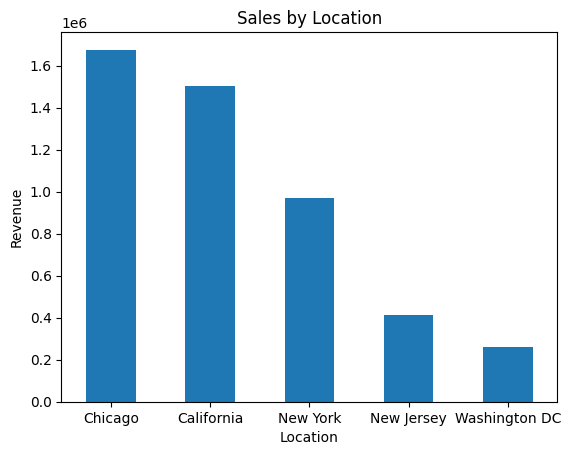

In [57]:
cust_final.groupby('Location')['Revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Revenue')
plt.title('Sales by Location')
plt.xticks(rotation=0)

plt.show()

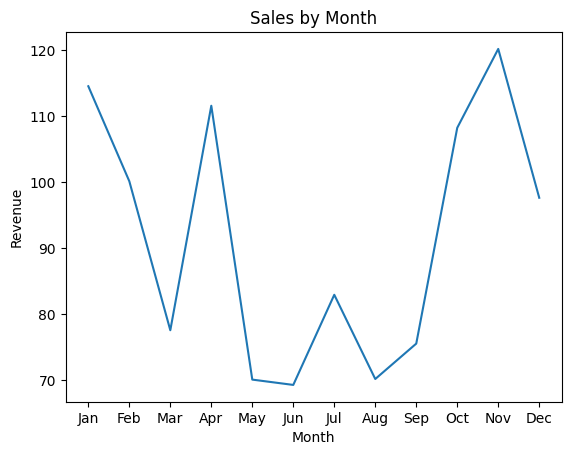

In [58]:
sns.lineplot(data = 'cust_final', x = cust_final['Transaction_Date'].dt.month, y = cust_final['Revenue'],errorbar= None)

labels = [calendar.month_abbr[num] for num in range(1,13)]

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1,13),labels,rotation=0)
plt.title('Sales by Month')
plt.show()


In [59]:
cust_final['Location'].unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

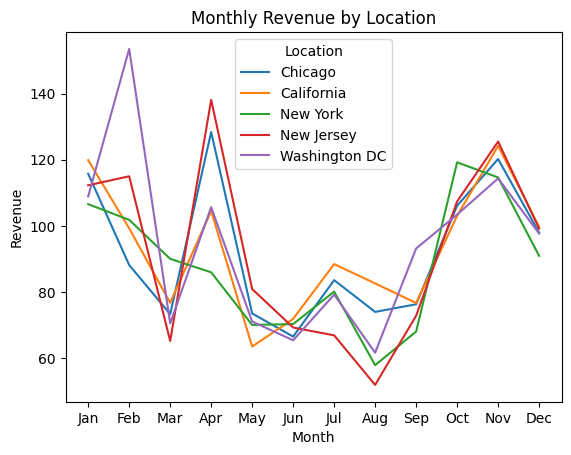

In [60]:
import  calendar

sns.lineplot(data = 'cust_final', x = cust_final['Transaction_Date'].dt.month, 
             y = cust_final['Revenue'], hue = cust_final['Location'],
             errorbar= None)

labels = [calendar.month_abbr[num] for num in range(1,13)]

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1,13),labels,rotation=0)
plt.title('Monthly Revenue by Location')
plt.show()

Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.

In [61]:
spend

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [62]:
mnthly_spend=spend.groupby(spend['Date'].dt.month)['Offline_Spend','Online_Spend'].sum().\
                            round().reset_index()

In [63]:
mnthly_spend

,Date,Offline_Spend,Online_Spend
0,1,96600,58329.0
1,2,81300,55808.0
2,3,73500,48750.0
3,4,96000,61027.0
4,5,65500,52760.0
5,6,80500,53818.0
6,7,67500,52718.0
7,8,85500,57404.0
8,9,83000,52515.0
9,10,93500,57725.0


In [64]:
#Calculating Tax amount per transaction
cust_final['Tax'] = cust_final['Avg_Price']*cust_final['Quantity']*cust_final['GST']

In [68]:
df_monthly = cust_final.groupby(cust_final['Transaction_Date'].dt.month)\
            ['Revenue','Tax','Delivery_Charges'].sum().round().reset_index()

In [69]:
df_monthly['Transaction_Date']=df_monthly['Transaction_Date'].astype(int)

In [70]:
df_monthly[['Offline_Spend','Online_Spend']] = mnthly_spend[['Offline_Spend','Online_Spend']]

In [71]:
df_monthly

,Transaction_Date,Revenue,Tax,Delivery_Charges,Offline_Spend,Online_Spend
0,1,471377.0,45948.0,61067.0,96600,58329.0
1,2,333875.0,37053.0,51436.0,81300,55808.0
2,3,341459.0,43004.0,62417.0,73500,48750.0
3,4,471036.0,50598.0,42999.0,96000,61027.0
4,5,324389.0,37917.0,42237.0,65500,52760.0
5,6,294131.0,38651.0,38238.0,80500,53818.0
6,7,447857.0,45085.0,50720.0,67500,52718.0
7,8,444934.0,45983.0,65092.0,85500,57404.0
8,9,327719.0,39650.0,41984.0,83000,52515.0
9,10,450881.0,39986.0,45980.0,93500,57725.0


In [72]:
# Calculating percentage of marketing spend, delivery charges and tax out of revenue
df_monthly['Total_Spend'] = df_monthly['Offline_Spend']+ df_monthly['Online_Spend']
df_monthly['Pct_Total_Spend']=((df_monthly['Total_Spend']/df_monthly['Revenue'])*100).round()
df_monthly['Pct_Delivery_Chrg']=((df_monthly['Delivery_Charges']/df_monthly['Revenue'])*100).round()
df_monthly['Pct_Tax']=((df_monthly['Tax']/df_monthly['Revenue'])*100).round()
 

In [73]:
import calendar
df_monthly['Transaction_Date'] = df_monthly['Transaction_Date'].apply(lambda num:calendar.month_abbr[num])

In [74]:
df_monthly.rename({'Transaction_Date':'Transaction_Month'},axis=1,inplace=True)

In [75]:
df_monthly

,Transaction_Month,Revenue,Tax,Delivery_Charges,Offline_Spend,Online_Spend,Total_Spend,Pct_Total_Spend,Pct_Delivery_Chrg,Pct_Tax
0,Jan,471377.0,45948.0,61067.0,96600,58329.0,154929.0,33.0,13.0,10.0
1,Feb,333875.0,37053.0,51436.0,81300,55808.0,137108.0,41.0,15.0,11.0
2,Mar,341459.0,43004.0,62417.0,73500,48750.0,122250.0,36.0,18.0,13.0
3,Apr,471036.0,50598.0,42999.0,96000,61027.0,157027.0,33.0,9.0,11.0
4,May,324389.0,37917.0,42237.0,65500,52760.0,118260.0,36.0,13.0,12.0
5,Jun,294131.0,38651.0,38238.0,80500,53818.0,134318.0,46.0,13.0,13.0
6,Jul,447857.0,45085.0,50720.0,67500,52718.0,120218.0,27.0,11.0,10.0
7,Aug,444934.0,45983.0,65092.0,85500,57404.0,142904.0,32.0,15.0,10.0
8,Sep,327719.0,39650.0,41984.0,83000,52515.0,135515.0,41.0,13.0,12.0
9,Oct,450881.0,39986.0,45980.0,93500,57725.0,151225.0,34.0,10.0,9.0


How marketing spend is impacting on revenue?

In [76]:
daily_revenue = cust_final.groupby(cust_final['Transaction_Date'])\
                          ['Revenue'].sum().round().reset_index()

In [77]:
daily_spend = spend.groupby(spend['Date'])['Offline_Spend','Online_Spend'].sum().\
                            round().reset_index()

In [78]:
daily_spend['Total_Spend'] = daily_spend['Offline_Spend'] + daily_spend['Online_Spend']

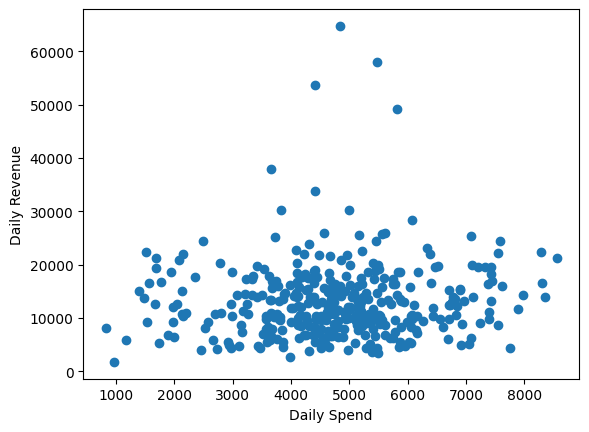

In [79]:
plt.scatter(daily_spend['Total_Spend'], daily_revenue['Revenue'])
plt.ylabel('Daily Revenue')
plt.xlabel('Daily Spend')
plt.show()

In [80]:
## Very weak correlation
daily_spend['Total_Spend'].corr(daily_revenue['Revenue'])

0.07878522983085987

In [81]:
daily_revenue['Revenue'] = daily_revenue['Revenue'].clip(upper = daily_revenue['Revenue'].quantile(0.99))

In [82]:
daily_spend['Total_Spend'].corr(daily_revenue['Revenue'])

0.08422739628823601

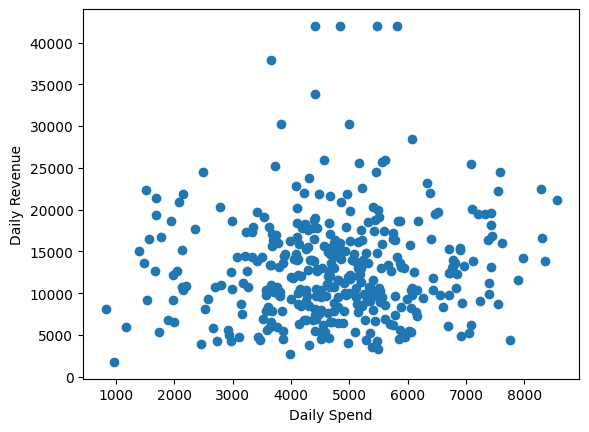

In [83]:
plt.scatter(daily_spend['Total_Spend'], daily_revenue['Revenue'])
plt.ylabel('Daily Revenue')
plt.xlabel('Daily Spend')
plt.show()

3. Performing Customer Segmentation

 Heuristic (Value based, RFM) - Divide the customers into Premium, Gold, Silver,
Standard customers and define strategy on the same

In [86]:
## Recency
df_RFM = cust_final.groupby(by = 'CustomerID', as_index = False)['Transaction_Date'].max()

In [87]:
df_RFM.rename({'Transaction_Date': 'Last_Purchase_Date'}, axis = 1, inplace = True)

In [88]:
recent_date = df_RFM['Last_Purchase_Date'].max()
recent_date

Timestamp('2019-12-31 00:00:00')

In [89]:
df_RFM['Recency'] = df_RFM['Last_Purchase_Date'].apply(lambda x: (recent_date - x).days)

In [90]:
# Frequency
Frequency= cust_final.groupby(by='CustomerID',as_index=False)['Transaction_Date'].nunique()
Frequency.rename({'Transaction_Date': 'Frequency'}, axis=1,inplace=True)

In [91]:
Frequency['Frequency'].unique()

array([ 1,  3,  2,  4,  5, 11,  6,  7, 34, 15,  9,  8, 20, 10, 27, 26, 24])

In [92]:
df_RFM['Frequency'] = Frequency['Frequency']

In [93]:
# Monetary
Monetary = cust_final.groupby(by = 'CustomerID', as_index = False)['Revenue'].sum()
Monetary.rename({'Revenue': 'Monetary'}, axis=1,inplace=True)

In [94]:
df_RFM['Monetary'] = Monetary['Monetary']

In [95]:
df_RFM

,CustomerID,Last_Purchase_Date,Recency,Frequency,Monetary
0,12346,2019-09-15,107,1,174.98174
1,12347,2019-11-02,59,3,12090.29580
2,12348,2019-10-19,73,2,1501.92620
3,12350,2019-12-14,17,1,1183.71394
4,12356,2019-09-15,107,1,1753.45086
...,...,...,...,...,...
1463,18259,2019-04-05,270,1,1185.01630
1464,18260,2019-10-05,87,3,2892.07113
1465,18269,2019-06-20,194,2,155.66092
1466,18277,2019-10-23,69,1,301.02000


#### Value based Segmentation

In [96]:
df_RFM.Monetary.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1     200.888209
0.2     538.125436
0.3     877.397293
0.4    1261.272828
0.5    1800.414780
0.6    2419.946846
0.7    3366.868360
0.8    4808.697734
0.9    7442.826368
Name: Monetary, dtype: float64

In [97]:
df_RFM["value_seg"]  = pd.qcut(df_RFM["Monetary"], q = 10 , labels = False)
df_RFM

,CustomerID,Last_Purchase_Date,Recency,Frequency,Monetary,value_seg
0,12346,2019-09-15,107,1,174.98174,0
1,12347,2019-11-02,59,3,12090.29580,9
2,12348,2019-10-19,73,2,1501.92620,4
3,12350,2019-12-14,17,1,1183.71394,3
4,12356,2019-09-15,107,1,1753.45086,4
...,...,...,...,...,...,...
1463,18259,2019-04-05,270,1,1185.01630,3
1464,18260,2019-10-05,87,3,2892.07113,6
1465,18269,2019-06-20,194,2,155.66092,0
1466,18277,2019-10-23,69,1,301.02000,1


In [98]:
df_RFM[['Recency', 'Monetary', 'Frequency', 'value_seg']].groupby('value_seg').mean().T

value_seg,0,1,2,3,4,5,6,7,8,9
Recency,187.544218,163.285714,154.938776,159.705479,158.884354,142.258503,128.780822,127.272109,125.863946,94.387755
Monetary,81.705867,363.018086,698.304009,1048.272133,1526.511524,2093.415533,2885.959392,4016.230908,6051.521434,14077.332748
Frequency,1.122449,1.360544,1.374150,1.527397,1.884354,1.863946,2.089041,2.571429,2.931973,5.122449


#### RFM Segmentation

In [99]:
quantiles = df_RFM[['Frequency','Monetary','Recency']].quantile(q=[0.33,0.67])
quantiles

,Frequency,Monetary,Recency
0.33,1.0,970.416159,78.00
0.67,2.0,3083.658759,187.89


In [100]:
df_RFM['r_seg'] = np.where(df_RFM['Recency']<=78, 'Active', np.where(df_RFM['Recency']<=187.89, 'At Risk', 'Churn'))
df_RFM['m_seg'] = np.where(df_RFM['Monetary']<=970.416, 1, np.where(df_RFM['Monetary']<=3083.6587, 2, 3))
df_RFM['f_seg'] = np.where(df_RFM['Frequency']<=1, 1, np.where(df_RFM['Frequency']<=2, 2, 3))

In [101]:
df_RFM['fm_seg'] = np.where(((df_RFM.f_seg == 3) & (df_RFM.m_seg ==3)) , 'Premium',
              np.where((((df_RFM.f_seg == 3) & (df_RFM.m_seg ==2)) | ((df_RFM.f_seg == 2) & (df_RFM.m_seg ==3))) , 'Gold',
              np.where((((df_RFM.f_seg == 1) & (df_RFM.m_seg ==3)) | ((df_RFM.f_seg == 3) & (df_RFM.m_seg ==1)) | ((df_RFM.f_seg == 2) & (df_RFM.m_seg ==2))), 'Silver', 'Standard' )))

In [102]:
df_RFM

,CustomerID,Last_Purchase_Date,Recency,Frequency,Monetary,value_seg,r_seg,m_seg,f_seg,fm_seg
0,12346,2019-09-15,107,1,174.98174,0,At Risk,1,1,Standard
1,12347,2019-11-02,59,3,12090.29580,9,Active,3,3,Premium
2,12348,2019-10-19,73,2,1501.92620,4,Active,2,2,Silver
3,12350,2019-12-14,17,1,1183.71394,3,Active,2,1,Standard
4,12356,2019-09-15,107,1,1753.45086,4,At Risk,2,1,Standard
...,...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,270,1,1185.01630,3,Churn,2,1,Standard
1464,18260,2019-10-05,87,3,2892.07113,6,At Risk,2,3,Gold
1465,18269,2019-06-20,194,2,155.66092,0,Churn,1,2,Standard
1466,18277,2019-10-23,69,1,301.02000,1,Active,1,1,Standard


In [103]:
df_RFM["fm_seg"].value_counts(), df_RFM["r_seg"].value_counts()

(Standard    696
 Silver      301
 Premium     244
 Gold        227
 Name: fm_seg, dtype: int64,
 At Risk    497
 Active     486
 Churn      485
 Name: r_seg, dtype: int64)

In [104]:
pd.crosstab(df_RFM["fm_seg"], df_RFM["r_seg"])

r_seg,Active,At Risk,Churn
fm_seg,,,
Gold,88,79,60
Premium,143,78,23
Silver,107,107,87
Standard,148,233,315


In [105]:
# Premium Customers who have Churned out
prem_churn = df_RFM[(df_RFM["fm_seg"] =="Premium")  & (df_RFM["r_seg"]=="Churn")]
prem_churn

,CustomerID,Last_Purchase_Date,Recency,Frequency,Monetary,value_seg,r_seg,m_seg,f_seg,fm_seg
26,12433,2019-04-10,265,3,18990.63501,9,Churn,3,3,Premium
81,12647,2019-06-26,188,4,3634.79326,7,Churn,3,3,Premium
274,13370,2019-04-08,267,3,3384.49288,7,Churn,3,3,Premium
282,13418,2019-06-08,206,3,3952.90574,7,Churn,3,3,Premium
627,14829,2019-06-12,202,4,4651.18410,7,Churn,3,3,Premium
641,14901,2019-05-24,221,5,4629.90629,7,Churn,3,3,Premium
642,14907,2019-05-24,221,3,4539.89708,7,Churn,3,3,Premium
659,15021,2019-03-30,276,3,3483.30680,7,Churn,3,3,Premium
748,15356,2019-05-24,221,4,9313.34551,9,Churn,3,3,Premium
765,15426,2019-03-15,291,3,7006.46800,8,Churn,3,3,Premium


In [106]:
#Premium Customers who are At Risk
prem_risk = df_RFM[(df_RFM["fm_seg"] =="Premium")  & (df_RFM["r_seg"]=="At Risk")]
prem_risk

,CustomerID,Last_Purchase_Date,Recency,Frequency,Monetary,value_seg,r_seg,m_seg,f_seg,fm_seg
9,12383,2019-09-23,99,4,5581.25406,8,At Risk,3,3,Premium
18,12415,2019-08-13,140,3,3475.93977,7,At Risk,3,3,Premium
39,12481,2019-08-02,151,4,10637.10784,9,At Risk,3,3,Premium
96,12683,2019-09-30,92,5,9977.80821,9,At Risk,3,3,Premium
118,12748,2019-09-15,107,34,79249.89921,9,At Risk,3,3,Premium
...,...,...,...,...,...,...,...,...,...,...
1390,17954,2019-09-03,119,3,6126.05780,8,At Risk,3,3,Premium
1430,18109,2019-09-17,105,6,3526.21360,7,At Risk,3,3,Premium
1432,18116,2019-07-16,168,6,11193.38630,9,At Risk,3,3,Premium
1433,18118,2019-09-16,106,5,20504.37055,9,At Risk,3,3,Premium


#### Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

#df = cust_final.groupby("CustomerID")["Revenue"].sum().reset_index()\
 #                                               .drop('CustomerID',axis=1)

df = pd.DataFrame(cust_final.groupby("CustomerID")["Revenue"].sum())

df

,Revenue
CustomerID,
12346,174.98174
12347,12090.29580
12348,1501.92620
12350,1183.71394
12356,1753.45086
...,...
18259,1185.01630
18260,2892.07113
18269,155.66092


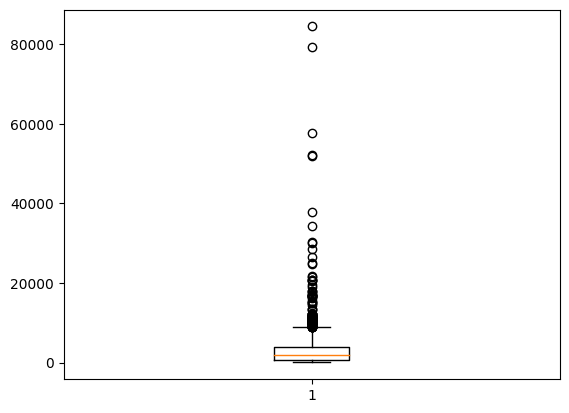

In [108]:
plt.boxplot(df['Revenue'])
plt.show()

In [109]:
print(np.where(df['Revenue']>22000))

(array([ 118,  202,  254,  447,  563,  578,  643,  667,  736,  850, 1218,
       1355, 1358]),)


In [110]:
# Clipping the highest value before clustering
df['Revenue'] = df['Revenue'].clip(upper = df['Revenue'].quantile(0.99))

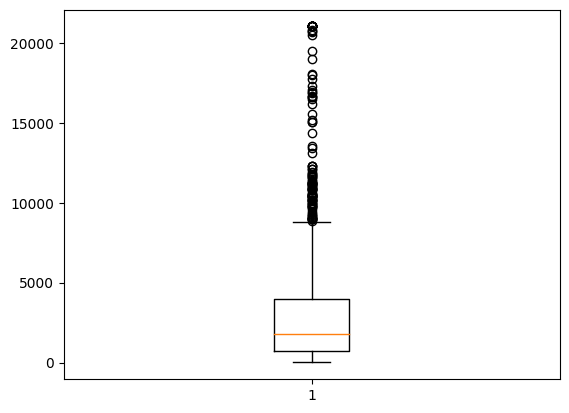

In [111]:
plt.boxplot(df['Revenue'])
plt.show()

In [112]:
## Scaling the data
std_scaler = StandardScaler()
df_transformed = pd.DataFrame(std_scaler.fit_transform(df),
                              columns=df.columns,index= df.index)
df_transformed

,Revenue
CustomerID,
12346,-0.776514
12347,2.399797
12348,-0.422785
12350,-0.507612
12356,-0.355735
...,...
18259,-0.507265
18260,-0.052209
18269,-0.781664


In [113]:
df_transformed["Revenue"].mean(), df_transformed["Revenue"].std()

(1.2040020812011235e-16, 1.0003407735658627)

Elbow Method to determine number of clusters

In [114]:
inertia_list, silhouette_list = [],[]
for cluster in range(2,10):
    kmeans = KMeans(n_clusters=cluster, n_init=10)
    kmeans.fit(df_transformed)
    inertia_list.append( kmeans.inertia_)


In [115]:
inertia_list

[508.80609168208116,
 229.17169050849597,
 116.90023603800253,
 70.06142678191202,
 49.24053784691945,
 36.94131336481695,
 26.55082471637771,
 20.557741676928156]

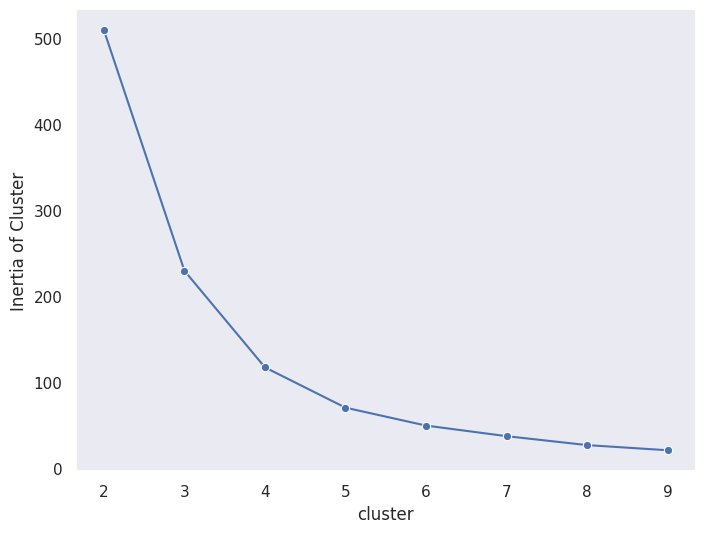

In [116]:
sns.set(rc={'figure.figsize':(8,6)})

sns.lineplot(x=list(range(2, 10)), y=inertia_list,marker='o')
plt.grid()
plt.xlabel('cluster')
plt.ylabel('Inertia of Cluster')

plt.show()

In [117]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(df_transformed)

KMeans(n_clusters=4, random_state=42)

In [118]:
df["cluster"] = kmeans.labels_
df

,Revenue,cluster
CustomerID,,
12346,174.98174,0
12347,12090.29580,1
12348,1501.92620,0
12350,1183.71394,0
12356,1753.45086,0
...,...,...
18259,1185.01630,0
18260,2892.07113,2
18269,155.66092,0


In [119]:
df.groupby("cluster").agg(["median","count"])

Revenue      
               median count
cluster                    
0          902.848910   906
1         8575.633920   152
2         3873.430105   372
3        20000.428475    38

Customers have been grouped into 4 clusters, based on revenue generated by them.

Cluster 0: 'Standard' Customers form 61.7% and generate low revenue.

Cluster 1: 'Gold' Customers form 10.3% of total customers and generate high revenue.

Cluster 2: 'Silver' Customers who form 25.3% of customers and generate moderate revenue.

Cluster 3: 'Platinum' Customers form 2.6% and generate very high revenue.